In [1]:
%load_ext autoreload
%autoreload 2

In [118]:
import numpy as np
import pandas as pd
import edisgo.flex_opt.optimization as opt
from edisgo.edisgo import import_edisgo_from_files
import geopandas as gpd
from edisgo.tools.tools import get_aggregated_bands
import matplotlib.pyplot as plt

In [3]:
grid_id = 1056

edisgo_dir = r'\\192.168.10.221\Daten_flexibel_02\simbev_results\eDisGo_object_files_final\Electrification_2050\{}\reduced'.format(grid_id)#Todo: change back to final in the end
edisgo = import_edisgo_from_files(edisgo_dir, import_timeseries=True,
                                  import_results=True)

In [55]:
downstream_nodes_matrix = pd.read_csv('grid_data/downstream_node_matrix.csv',
                                      index_col=0)
downstream_nodes_matrix = downstream_nodes_matrix.astype(np.uint8)
print('Downstream node matrix imported.')
flexibility_bands_home = \
    pd.read_csv('grid_data/ev_flexibility_bands_home.csv', index_col=0,
                dtype=np.float16)
flexibility_bands_work = \
    pd.read_csv('grid_data/ev_flexibility_bands_work.csv', index_col=0,
                dtype=np.float16)
flexibility_bands = pd.concat([flexibility_bands_work, flexibility_bands_home],
                              axis=1)
flexibility_bands = \
    flexibility_bands.groupby(flexibility_bands.columns, axis=1).sum()

Downstream node matrix imported.


In [56]:
mapping_home = \
    gpd.read_file('grid_data/cp_data_home_within_grid_{}.geojson'.
                  format(grid_id)).set_index('edisgo_id')
mapping_work = \
    gpd.read_file('grid_data/cp_data_work_within_grid_{}.geojson'.
                  format(grid_id)).set_index('edisgo_id')

mapping = pd.concat([mapping_work, mapping_home], sort=False)

In [57]:
lv_grids = [grid for grid in edisgo.topology.mv_grid.lv_grids]

lv_grid = lv_grids[1]
timeindex=edisgo.timeseries.timeindex[0:95]
t_start = 0

In [58]:
downstream_node_matrix = downstream_nodes_matrix.loc[lv_grid.buses_df.index,
                                                     lv_grid.buses_df.index]
cp_lv_grid = lv_grid.charging_points_df.loc[
    lv_grid.charging_points_df.use_case == 'home'].index.append(
    lv_grid.charging_points_df.loc[
        lv_grid.charging_points_df.use_case == 'work'].index)
mapping_lv_grid = mapping.loc[cp_lv_grid]
cp_band_id = \
    ('upper_' + mapping_lv_grid.ags.astype(str) +
     '_'+mapping_lv_grid.cp_idx.astype(str)).append(
        'lower_' + mapping_lv_grid.ags.astype(str)+'_' +
        mapping_lv_grid.cp_idx.astype(str)).append(
        'power_' + mapping_lv_grid.ags.astype(str)+'_' +
        mapping_lv_grid.cp_idx.astype(str)).values
bands_lv_grid = flexibility_bands.loc[
                :, flexibility_bands.columns.isin(cp_band_id)]

In [74]:
mapping_lv_grid

,ags,cp_idx,cp_count,cp_capacity,cp_connection_rating,cp_00001,cp_00002,cp_00003,cp_00004,cp_00005,...,cp_00015,cp_00016,cp_00017,cp_00018,cp_00019,cp_00020,cp_00021,cp_00022,cp_00023,geometry
name,,,,,,,,,,,,,,,,,,,,,
ChargingPoint_LVGrid_440345_1,9674130,487,2,72.0,72.0,19.8,45.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (10.80043 50.08709)
ChargingPoint_LVGrid_440345_2,9674130,508,2,33.0,33.0,9.9,19.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (10.80043 50.08709)
ChargingPoint_LVGrid_440345_3,9674130,529,2,44.0,44.0,19.8,19.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (10.80043 50.08709)
ChargingPoint_LVGrid_440345_4,9674130,547,1,22.0,22.0,19.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (10.80043 50.08709)
ChargingPoint_LVGrid_440345_5,9674130,564,1,22.0,22.0,19.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (10.80043 50.08709)
ChargingPoint_LVGrid_440345_6,9674130,567,1,50.0,50.0,45.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (10.80043 50.08709)


In [77]:
tmp_bands_lv_grid = bands_lv_grid.iloc[t_start:t_start+len(timeindex)].set_index(timeindex)
#tmp_bands_lv_grid.plot()

In [78]:
model = opt.setup_model(lv_grid, downstream_node_matrix, timesteps=timeindex,
                        optimize_storage=False, mapping_cp=mapping_lv_grid,
                        energy_band_charging_points=tmp_bands_lv_grid, pu=False,
                        objective='minimize_energy_level')

Setup model: Defining sets and parameters.
Setup model: Defining variables.
Setup model: Setting constraints.
Setup model: Setting objective.
Successfully set up optimisation model.


In [79]:
x_charge, soc, x_charge_ev, energy_level_cp, curtailment_feedin, \
   curtailment_load, curtailment_reactive_feedin, curtailment_reactive_load, \
   v_bus, p_line, q_line, p_agr_min = opt.optimize(model, 'glpk', mode='energy_band')
curtailment_feedin.sum().sum(), curtailment_load.sum().sum()

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpmyq6ynta.glpk.raw --wglp
 C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmprl9pr5hc.glpk.glp --cpxlp C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmphha9auxv.pyomo.lp
Reading problem data from 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmphha9auxv.pyomo.lp'...
1046 rows, 3136 columns, 5321 non-zeros
13217 lines were read
Writing problem data to 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmprl9pr5hc.glpk.glp'...
13402 lines were written
GLPK Simplex Optimizer, v4.65
1046 rows, 3136 columns, 5321 non-zeros
Preprocessing...
855 rows, 1805 columns, 3705 non-zeros
Scaling...
 A: min|aij| =  1.305e-04  max|aij| =  1.000e+00  ratio =  7.663e+03
GM: min|aij| =  5.549e-01  max|aij| =  1.802e+00  ratio =  3.248e+00
EQ: min|aij| =  3.116e-01  max|aij| =  1.000e+00  ratio =  3.209e+00
Constructing initial basis...
Size of triangular part is 855
      0: obj =  -1.177407968e+08 inf =   6.27

(0.0, 0.0)

In [80]:
model_max = opt.setup_model(lv_grid, downstream_node_matrix, timesteps=timeindex,
                        optimize_storage=False, mapping_cp=mapping_lv_grid,
                        energy_band_charging_points=tmp_bands_lv_grid, pu=False,
                        objective='maximize_energy_level')

Setup model: Defining sets and parameters.
Setup model: Defining variables.
Setup model: Setting constraints.
Setup model: Setting objective.
Successfully set up optimisation model.


In [81]:
x_charge, soc, x_charge_ev, energy_level_cp, curtailment_feedin, \
   curtailment_load, curtailment_reactive_feedin, curtailment_reactive_load, \
   v_bus, p_line, q_line, p_agr_max = opt.optimize(model_max, 'glpk', mode='energy_band')

curtailment_feedin.sum().sum(), curtailment_load.sum().sum()

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpf43pnrss.glpk.raw --wglp
 C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpw4ht5uqk.glpk.glp --cpxlp C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpramtkohg.pyomo.lp
Reading problem data from 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpramtkohg.pyomo.lp'...
1046 rows, 3136 columns, 5321 non-zeros
13217 lines were read
Writing problem data to 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpw4ht5uqk.glpk.glp'...
13402 lines were written
GLPK Simplex Optimizer, v4.65
1046 rows, 3136 columns, 5321 non-zeros
Preprocessing...
855 rows, 1805 columns, 3705 non-zeros
Scaling...
 A: min|aij| =  1.305e-04  max|aij| =  1.000e+00  ratio =  7.663e+03
GM: min|aij| =  5.549e-01  max|aij| =  1.802e+00  ratio =  3.248e+00
EQ: min|aij| =  3.116e-01  max|aij| =  1.000e+00  ratio =  3.209e+00
Constructing initial basis...
Size of triangular part is 855
      0: obj =  -1.177407976e+08 inf =   6.27

(0.0, 0.0)

In [82]:
power_bands = pd.concat([p_agr_min.rename(columns={repr(lv_grid):'lower'}), 
                        p_agr_max.rename(columns={repr(lv_grid):'upper'})],axis=1)
energy_bands = get_aggregated_bands(tmp_bands_lv_grid)

<AxesSubplot:>

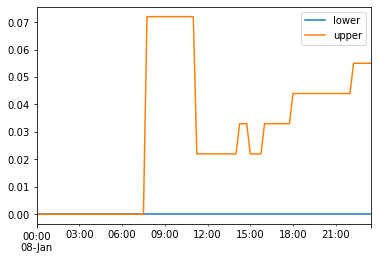

In [83]:
power_bands.plot()

<AxesSubplot:>

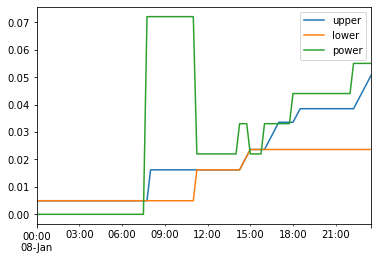

In [84]:
energy_bands.plot()

In [94]:
mode = "minimize"
model_min_eb = opt.setup_model_bands(energy_bands, power_bands, mode=mode)
energy_level_min, charging = opt.optimize_bands(model_min_eb, 'glpk', mode)

Setup Model: Defining Parameters and Sets
Setup Model: Defining Variables
Setup Model: Defining Constraints
Setup Model: Defining Objective
GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpagj1mzuk.glpk.raw --wglp
 C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpm83s4ili.glpk.glp --cpxlp C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpurhxttjz.pyomo.lp
Reading problem data from 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpurhxttjz.pyomo.lp'...
95 rows, 190 columns, 283 non-zeros
860 lines were read
Writing problem data to 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpm83s4ili.glpk.glp'...
856 lines were written
GLPK Simplex Optimizer, v4.65
95 rows, 190 columns, 283 non-zeros
Preprocessing...
41 rows, 43 columns, 82 non-zeros
Scaling...
 A: min|aij| =  2.250e-01  max|aij| =  1.000e+00  ratio =  4.444e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 41
*     0: obj =   1.300025

In [98]:
mode = "maximize"
model_max_eb = opt.setup_model_bands(energy_bands, power_bands, mode=mode)
energy_level_max, charging_max = opt.optimize_bands(model_max_eb, 'glpk', mode)

Setup Model: Defining Parameters and Sets
Setup Model: Defining Variables
Setup Model: Defining Constraints
Setup Model: Defining Objective
GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmp05f2t9z0.glpk.raw --wglp
 C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpuw3z11xa.glpk.glp --cpxlp C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpxv5wm4qn.pyomo.lp
Reading problem data from 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpxv5wm4qn.pyomo.lp'...
95 rows, 190 columns, 283 non-zeros
860 lines were read
Writing problem data to 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpuw3z11xa.glpk.glp'...
856 lines were written
GLPK Simplex Optimizer, v4.65
95 rows, 190 columns, 283 non-zeros
Preprocessing...
41 rows, 43 columns, 82 non-zeros
Scaling...
 A: min|aij| =  2.250e-01  max|aij| =  1.000e+00  ratio =  4.444e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 41
*     0: obj =  -1.300025

<AxesSubplot:>

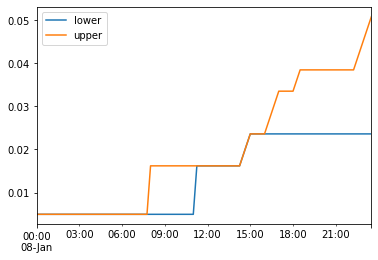

In [107]:
energy_band_grid = pd.concat([energy_level_min,energy_level_max],axis=1)
energy_band_grid.plot()

In [17]:
v_bus.min()

BusBar_mvgd_1056_lvgd_440345_LV      0.400000
BranchTee_mvgd_1056_lvgd_440345_1    0.397565
BranchTee_mvgd_1056_lvgd_440345_2    0.397544
Bus_mvgd_1056_lvgd_440345_loa_1      0.397543
dtype: float64

In [101]:
model_slack = opt.setup_model(lv_grid, downstream_node_matrix, timesteps=timeindex,
                        optimize_storage=False, mapping_cp=mapping_lv_grid,
                        energy_band_charging_points=tmp_bands_lv_grid, pu=False,
                        objective='minimize_energy_level', v_slack=0.36)
x_charge, soc, x_charge_ev, energy_level_cp, curtailment_feedin, \
   curtailment_load, curtailment_reactive_feedin, curtailment_reactive_load, \
   v_bus, p_line, q_line, p_agr_min_slack = opt.optimize(model_slack, 'glpk', mode='energy_band')

curtailment_feedin.sum().sum(), curtailment_load.sum().sum()

Setup model: Defining sets and parameters.
Setup model: Defining variables.
Setup model: Setting constraints.
Setup model: Setting objective.
Successfully set up optimisation model.
GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmph79tm63b.glpk.raw --wglp
 C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpkmmj1rc8.glpk.glp --cpxlp C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpq12s2rff.pyomo.lp
Reading problem data from 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpq12s2rff.pyomo.lp'...
1046 rows, 3136 columns, 5321 non-zeros
13217 lines were read
Writing problem data to 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpkmmj1rc8.glpk.glp'...
13402 lines were written
GLPK Simplex Optimizer, v4.65
1046 rows, 3136 columns, 5321 non-zeros
Preprocessing...
855 rows, 1805 columns, 3705 non-zeros
Scaling...
 A: min|aij| =  1.305e-04  max|aij| =  1.000e+00  ratio =  7.663e+03
GM: min|aij| =  5.549e-01  max|aij| =  1.802e+00  ratio =  3.2

(0.0, 0.07381150448332992)

In [102]:
model_max_slack = opt.setup_model(lv_grid, downstream_node_matrix, timesteps=timeindex,
                        optimize_storage=False, mapping_cp=mapping_lv_grid,
                        energy_band_charging_points=tmp_bands_lv_grid, pu=False,
                        objective='maximize_energy_level', v_slack=0.36)
x_charge, soc, x_charge_ev, energy_level_cp, curtailment_feedin, \
   curtailment_load, curtailment_reactive_feedin, curtailment_reactive_load, \
   v_bus, p_line, q_line, p_agr_max_slack = opt.optimize(model_max_slack, 'glpk', mode='energy_band')

curtailment_feedin.sum().sum(), curtailment_load.sum().sum()

Setup model: Defining sets and parameters.
Setup model: Defining variables.
Setup model: Setting constraints.
Setup model: Setting objective.
Successfully set up optimisation model.
GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpbly4zyxz.glpk.raw --wglp
 C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpg26n4phu.glpk.glp --cpxlp C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmp79v43z6u.pyomo.lp
Reading problem data from 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmp79v43z6u.pyomo.lp'...
1046 rows, 3136 columns, 5321 non-zeros
13217 lines were read
Writing problem data to 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpg26n4phu.glpk.glp'...
13402 lines were written
GLPK Simplex Optimizer, v4.65
1046 rows, 3136 columns, 5321 non-zeros
Preprocessing...
855 rows, 1805 columns, 3705 non-zeros
Scaling...
 A: min|aij| =  1.305e-04  max|aij| =  1.000e+00  ratio =  7.663e+03
GM: min|aij| =  5.549e-01  max|aij| =  1.802e+00  ratio =  3.2

(0.0, 0.07381150448332992)

In [103]:
power_bands_slack = pd.concat([p_agr_min_slack.rename(columns={repr(lv_grid):'lower'}), 
                        p_agr_max_slack.rename(columns={repr(lv_grid):'upper'})],axis=1)
energy_bands = get_aggregated_bands(tmp_bands_lv_grid)

In [104]:
mode = "minimize"
model_min_eb_slack = opt.setup_model_bands(energy_bands, power_bands_slack, mode=mode)
energy_level_min_slack, charging = opt.optimize_bands(model_min_eb_slack, 'glpk', mode)
mode = "maximize"
model_max_eb_slack = opt.setup_model_bands(energy_bands, power_bands_slack, mode=mode)
energy_level_max_slack, charging = opt.optimize_bands(model_max_eb_slack, 'glpk', mode)

Setup Model: Defining Parameters and Sets
Setup Model: Defining Variables
Setup Model: Defining Constraints
Setup Model: Defining Objective
GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmp_wbiq7pv.glpk.raw --wglp
 C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpac7a4r7d.glpk.glp --cpxlp C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpj9y2hvgu.pyomo.lp
Reading problem data from 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpj9y2hvgu.pyomo.lp'...
95 rows, 190 columns, 283 non-zeros
860 lines were read
Writing problem data to 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpac7a4r7d.glpk.glp'...
856 lines were written
GLPK Simplex Optimizer, v4.65
95 rows, 190 columns, 283 non-zeros
Preprocessing...
16 rows, 18 columns, 32 non-zeros
Scaling...
 A: min|aij| =  2.250e-01  max|aij| =  1.000e+00  ratio =  4.444e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 16
*     0: obj =   1.300025

<AxesSubplot:>

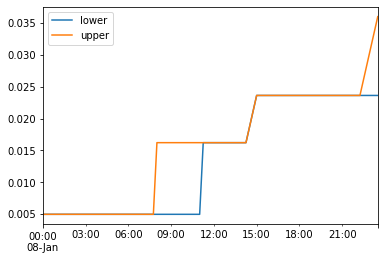

In [106]:
energy_band_grid_slack = pd.concat([energy_level_min_slack,energy_level_max_slack],axis=1)
energy_band_grid_slack.plot()

In [109]:
energy_band_grid_slack.rename(columns={'lower':'lower_constrained', 'upper': 'upper_constrained'}, inplace=True)

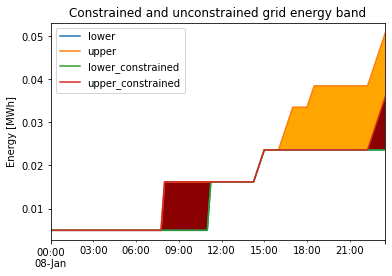

In [123]:
energy_bands_comparison = pd.concat([energy_band_grid, energy_band_grid_slack],axis=1)
ax = energy_bands_comparison.plot()
ax.fill_between(energy_bands_comparison.index, energy_bands_comparison['lower'], 
                energy_bands_comparison['upper'],facecolor='orange')
ax.fill_between(energy_bands_comparison.index, energy_bands_comparison['lower_constrained'], 
                energy_bands_comparison['upper_constrained'],facecolor='darkred')
plt.ylabel('Energy [MWh]')
plt.title('Constrained and unconstrained grid energy band')
plt.savefig('plots/energy_bands_lv_grid.pdf')

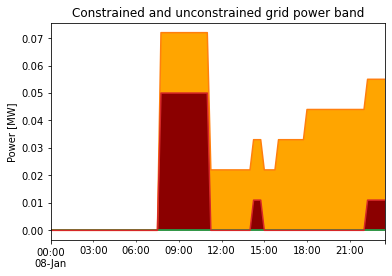

In [124]:
power_bands_slack.rename(columns={'lower':'lower_constrained', 'upper': 'upper_constrained'}, inplace=True)
power_bands_comparison = pd.concat([power_bands, power_bands_slack],axis=1)
ax = power_bands_comparison.plot(legend=False)
ax.fill_between(power_bands_comparison.index, power_bands_comparison['lower'], 
                power_bands_comparison['upper'],facecolor='orange')
ax.fill_between(power_bands_comparison.index, power_bands_comparison['lower_constrained'], 
                power_bands_comparison['upper_constrained'],facecolor='darkred')
plt.ylabel('Power [MW]')
plt.title('Constrained and unconstrained grid power band')
plt.savefig('plots/power_bands_lv_grid.pdf')

<AxesSubplot:>

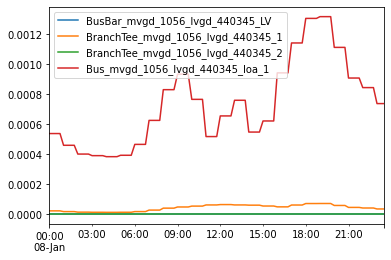

In [22]:
curtailment_load.plot()

In [23]:
model_max = opt.setup_model(lv_grid, downstream_node_matrix, timesteps=timeindex,
                        optimize_storage=False, mapping_cp=mapping_lv_grid,
                        energy_band_charging_points=tmp_bands_lv_grid, pu=False,
                        objective='maximize_energy_level', v_slack=0.36)

Setup model: Defining sets and parameters.
First timestep: 0, last timestep: 94.
Setup model: Defining variables.
Setup model: Setting constraints.
Setup model: Setting objective.
Successfully set up optimisation model.


In [24]:
x_charge, soc, x_charge_ev, energy_level_cp, curtailment_feedin, \
   curtailment_load, curtailment_reactive_feedin, curtailment_reactive_load, \
   v_bus, p_line, q_line, p_agr_max = opt.optimize(model_max, 'glpk', mode='energy_band')

curtailment_feedin.sum().sum(), curtailment_load.sum().sum()

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpg4pspoza.glpk.raw --wglp
 C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpw1u6qtps.glpk.glp --cpxlp C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmp610oyuyk.pyomo.lp
Reading problem data from 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmp610oyuyk.pyomo.lp'...
1046 rows, 3136 columns, 5321 non-zeros
13217 lines were read
Writing problem data to 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpw1u6qtps.glpk.glp'...
13402 lines were written
GLPK Simplex Optimizer, v4.65
1046 rows, 3136 columns, 5321 non-zeros
Preprocessing...
855 rows, 1805 columns, 3705 non-zeros
Scaling...
 A: min|aij| =  1.305e-04  max|aij| =  1.000e+00  ratio =  7.663e+03
GM: min|aij| =  5.549e-01  max|aij| =  1.802e+00  ratio =  3.248e+00
EQ: min|aij| =  3.116e-01  max|aij| =  1.000e+00  ratio =  3.209e+00
Constructing initial basis...
Size of triangular part is 855
      0: obj =   5.515599600e+07 inf =   4.34

(0.0, 0.07381150448332992)

<AxesSubplot:>

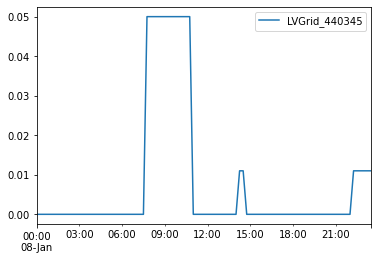

In [25]:
p_agr_max.plot()

In [28]:
power_bands = pd.concat([p_agr_min.rename(columns={repr(lv_grid):'lower'}), 
                        p_agr_max.rename(columns={repr(lv_grid):'upper'})],axis=1)
energy_bands = get_aggregated_bands(tmp_bands_lv_grid)

In [41]:
model_min_eb = opt.setup_model_bands(energy_bands, power_bands, mode="minimize")

Setup Model: Defining Parameters and Sets
Setup Model: Defining Variables
Setup Model: Defining Constraints
Setup Model: Defining Objective
2 Set Declarations
    time_non_zero : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain                           : Size : Members
        None :     1 : time_set - time_non_zero_index_0 :   94 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94}
    time_non_zero_index_0 : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    1 :    {0,}

1 RangeSet Declarations
    time_set : Dimen=1, Size=95, Bounds=(0, 94)
        Key  : Finite : Members
        None :   

In [40]:
opt.optimize_bands(model_min_eb, 'glpk', "minimize")

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpvn_amx7x.glpk.raw --wglp
 C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmp0og9jdmd.glpk.glp --cpxlp C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpq9u8h2vj.pyomo.lp
Reading problem data from 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpq9u8h2vj.pyomo.lp'...
95 rows, 190 columns, 283 non-zeros
860 lines were read
Writing problem data to 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmp0og9jdmd.glpk.glp'...
856 lines were written
glp_simplex: column 24: lb = 2.95117, ub = 2.93359; incorrect bounds
If you need actual output for non-optimal solution, use --nopresol
Time used:   0.0 secs
Memory used: 0.1 Mb (91137 bytes)
Writing basic solution to 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpvn_amx7x.glpk.raw'...
294 lines were written
Solver Status:  ok


<AxesSubplot:>

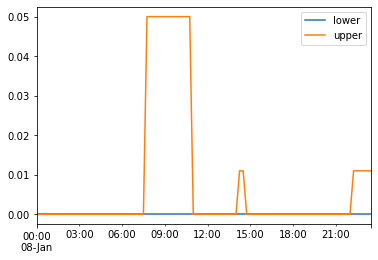

In [37]:
power_bands.plot()

<AxesSubplot:>

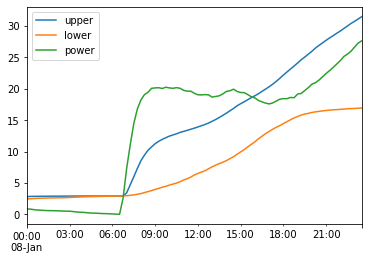

In [38]:
energy_bands.plot()

In [51]:
bands = tmp_bands_lv_grid
columns_upper = [col for col in bands.columns if 'upper' in col]
columns_lower = [col for col in bands.columns if 'lower' in col]
columns_power = [col for col in bands.columns if 'power' in col]
columns_upper.sort()
columns_lower.sort()
columns_power.sort()

In [54]:
for i in range(len(columns_upper)):
    if (tmp_bands_lv_grid[columns_lower[i]]>tmp_bands_lv_grid[columns_upper[i]]).any():
        print(columns_lower[i])

lower_9471133_126
lower_9471133_15
lower_9471133_161
lower_9471133_188
lower_9471133_39
lower_9471133_98
lower_9674130_1034
lower_9674130_1063
lower_9674130_1137
lower_9674130_1156
lower_9674130_1191
lower_9674130_122
lower_9674130_1220
lower_9674130_136
lower_9674130_1360
lower_9674130_1404
lower_9674130_1454
lower_9674130_1507
lower_9674130_156
lower_9674130_157
lower_9674130_165
lower_9674130_1662
lower_9674130_1664
lower_9674130_1673
lower_9674130_199
lower_9674130_211
lower_9674130_216
lower_9674130_239
lower_9674130_261
lower_9674130_287
lower_9674130_310
lower_9674130_347
lower_9674130_368
lower_9674130_378
lower_9674130_381
lower_9674130_428
lower_9674130_438
lower_9674130_448
lower_9674130_46
lower_9674130_485
lower_9674130_529
lower_9674130_539
lower_9674130_558
lower_9674130_60
lower_9674130_613
lower_9674130_635
lower_9674130_636
lower_9674130_644
lower_9674130_663
lower_9674130_670
lower_9674130_744
lower_9674130_746
lower_9674130_758
lower_9674130_809
lower_9674130_850
lo